# Bike Sharing Project

In [1]:
# imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
import datetime as df
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score


In [2]:
# load data
f = pd.read_csv("Trips_2018.csv")
f.head()

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [4]:
#remove the unwanted column ["Unnamed: 0"] ,[birth_year] and only keep station_id about station information
#first step of data cleaning

f = f.drop(columns=['Unnamed: 0','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','stoptime','bikeid']) 


The vector that we want to use for regression will correspond to each individual hour per individual day. So, we need to transform our dataframe such that we end up with each row corresponding to a day and each columns corresponding to one hour.

In [6]:
#the usual datetime format conversions
f['starttime']=pd.to_datetime(f['starttime'], format="%Y-%m-%d %H:%M:%S")

#f.set_index("starttime")


In [3]:
#The usertype and gender are **categorical** variable, which can have one of a finite set of values.
#to transform categorical variables into "dummy variables". 
f=pd.get_dummies(f, columns=['usertype','gender'])


In [7]:
#f=dt.groupby((['date', 'hour'])).agg({'bikeid':'count'})
#f.head()

df=f.groupby([pd.Grouper(key='starttime',freq='H')]).size().reset_index(name='Nb_pickups')


In [8]:
df.head()

,starttime,Nb_pickups
0,2018-01-01 00:00:00,119
1,2018-01-01 01:00:00,168
2,2018-01-01 02:00:00,98
3,2018-01-01 03:00:00,72
4,2018-01-01 04:00:00,34


In [12]:
df['hour'] = pd.to_datetime(df['starttime']).dt.hour+1

In [14]:
df['hour']

0        1
1        2
2        3
3        4
4        5
        ..
8755    20
8756    21
8757    22
8758    23
8759    24
Name: hour, Length: 8760, dtype: int64

In [84]:
y=df['Nb_pickups'].to_numpy()

y=y.reshape(-1,1)

#X=df['starttime'].astype("int64").values.reshape(-1, 1)


#X=pd.to_datetime(df['starttime']).astype(np.int64)
X=df['hour'].to_numpy()
X=X.reshape(-1,1)

X=X.astype(float,casting="safe")

In [74]:
y.shape

(8760, 1)

In [85]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       ...,
       [22.],
       [23.],
       [24.]])

In [16]:
X.astype(float, casting='safe')

array([[ 1.],
       [ 2.],
       [ 3.],
       ...,
       [22.],
       [23.],
       [24.]])

# Ridge regression

In [34]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
                   

In [19]:
alphas = 10**np.linspace(-10, 10, 100)

In [93]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)
hour_coefficients = [coef[0] for coef in coefs]


Text(0, 0.5, 'weights')

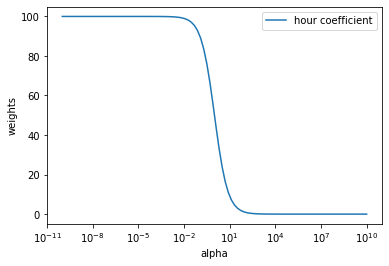

In [94]:
ax = plt.gca()
ax.set_xscale('log')
ax.plot(alphas, hour_coefficients, label="hour coefficient")

plt.legend()
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [107]:
for alpha in [alphas[0], alphas[50], alphas[-1]]:
    ridge = Ridge(normalize=True, alpha=alpha)
    ridge.fit(x_train, y_train)
    print("alhpa = {}".format(alpha))
    print("R^2 on train data is {} and on test data is {}".format(ridge.score(x_train, y_train), 
                                                              ridge.score(x_test,y_test)))
    print("")

alhpa = 1e-10
R^2 on train data is 0.10230394154766265 and on test data is 0.03445921192919721

alhpa = 1.2618568830660184
R^2 on train data is 0.07046326223452193 and on test data is -0.00030251565877215114

alhpa = 10000000000.0
R^2 on train data is 2.0460855232329322e-11 and on test data is -0.0550095485322497



In [87]:
30*24+28*24

1392

In [88]:
7*24

168

In [97]:
split=1392
x_train = X[:split]
x_test =X[split:split+168]
y_train = y[:split]
y_test = y[split:split+168]

In [92]:
x_train

array([[ 1.],
       [ 2.],
       [ 3.],
       ...,
       [22.],
       [23.],
       [24.]])

In [105]:
y_train

array([[ 119],
       [ 168],
       [  98],
       ...,
       [1427],
       [ 962],
       [ 523]], dtype=int64)

In [106]:
x_test

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.],
       [21.],
       [22.],
       [23.],
       [24.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.],
       [21.],
       [22.],
       [23.],
       [24.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.],
       [21.],
       [22.],
       [23.],
      

In [100]:
ridgecv = RidgeCV(alphas = alphas, normalize = True)
ridgecv.fit(x_train, y_train)
ridgecv.alpha_

0.004750810162102793

In [103]:
score = ridgecv.score(x_train, y_train)

In [104]:
score

0.10230165431159997

In [102]:
print("R^2 on train data is {} and on test data is {}".format(ridgecv.score(x_train, y_train), 
                                                              ridgecv.score(x_test,y_test)))

R^2 on train data is 0.10230165431159997 and on test data is 0.03432526002362002


# The Lasso

In [31]:
(2/12)*8760

1460.0

In [69]:
(7/365)*8760

168.0

In [51]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
np.shape(coefs)
hour_coefficients = [coef[0] for coef in coefs]

Text(0, 0.5, 'weights')

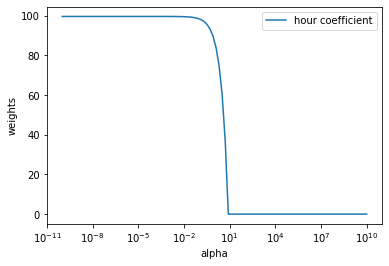

In [52]:
ax = plt.gca()
ax.set_xscale('log')
ax.plot(alphas, hour_coefficients, label="hour coefficient")
plt.legend()
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [55]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(x_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Lasso(alpha=0.008693533375958143, copy_X=True, fit_intercept=True,
      max_iter=10000, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [56]:
print("R^2 on train data is {} and on test data is {}".format(lassocv.score(X_train, y_train), 
                                                              lassocv.score(X_test,y_test)))

R^2 on train data is -0.15374783329391128 and on test data is -0.3851841495244661
